In [33]:
import glob
from PIL import Image
from skimage.measure import compare_psnr
import numpy as np
import math
from PIL import Image, ImageFont, ImageDraw, ImageEnhance
import matplotlib.pyplot as plt
from IPython.display import display

In [34]:
def get_noisy_image(img_np, sigma, clip=False):
    """Adds Gaussian noise to an image.

    Args:
        img_np: image, np.array with values from 0 to 1
        sigma: std of the noise
    """
    if clip:
        img_noisy_np = np.clip(img_np + np.random.normal(scale=sigma, size=img_np.shape), 0, 1).astype(np.float32)
    else:
        img_noisy_np = (img_np + np.random.normal(scale=sigma, size=img_np.shape)).astype(np.float32)

    img_noisy_pil = np_to_pil(img_noisy_np)

    return img_noisy_pil, img_noisy_np

def pil_to_np(img_PIL):
    '''Converts image in PIL format to np.array.

    From W x H x C [0...255] to C x W x H [0..1]
    '''
    ar = np.array(img_PIL)

    if len(ar.shape) == 3:
        ar = ar.transpose(2, 0, 1)
    else:
        ar = ar[None, ...]

    return ar.astype(np.float32) / 255.


def np_to_pil(img_np):
    '''Converts image in np.array format to PIL image.

    From C x W x H [0..1] to  W x H x C [0...255]
    '''
    ar = np.clip(img_np * 255, 0, 255).astype(np.uint8)

    if img_np.shape[0] == 1:
        ar = ar[0]
    else:
        ar = ar.transpose(1, 2, 0)

    return Image.fromarray(ar)


In [32]:
ls

23_bb.png
23_group.png
23_gt.png
23_noisy.png
23_sc.png
baboon_bb.png
baboon_group.png
baboon_gt.png
baboon_noisy.png
baboon_sc.png
barbara_bb.png
barbara_group.png
barbara_gt.png
barbara_noisy.png
barbara_sc.png
bm3d.ipynb
challenging_div2k.ipynb
dummy_test_chall_psnr.ipynb
extract_patch_gre.ipynb
extract_patch_sequoia_denoising_gray.ipynb
extract_patch_sequoia_denoising.ipynb
extract_patch_sequoia.ipynb
group.png
gt.png
imdirgray/
jpeg_viz.ipynb
lena_bb.png
lena_group.png
lena_gt.png
lena_noisy.png
lena_sc.png
noisy.png
peppers_bb.png
peppers_group.png
peppers_gt.png
peppers_noisy.png
peppers_sc.png
sc.png
visualisation_cvx.ipynb


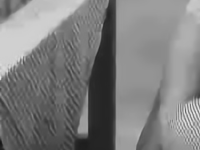

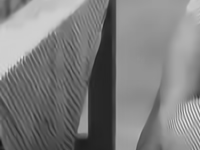

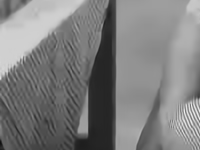

In [41]:
idx = 23
x = 0
y = 200
w=200
h =150

elem=[]
elem += glob.glob(f'./group.png')
elem += glob.glob(f'./sc.png')
elem += glob.glob(f'./gt.png')
elem += glob.glob(f'./noisy.png')
elem += glob.glob(f'../ARCNN_classic5/barbara.bmp')

elem_pil = [(Image.open(i)) for i in elem]
gt = elem_pil[2]

elem_pil = [i.crop((x,y,x+w,y+h)) for i in  elem_pil]

elem_pil[0].save(f'{idx}_group.png')
elem_pil[1].save(f'{idx}_sc.png')
elem_pil[2].save(f'{idx}_gt.png')
elem_pil[3].save(f'{idx}_noisy.png')
elem_pil[3].save(f'{idx}_arcnn.png')

display(elem_pil[4],elem_pil[0],elem_pil[1],elem_pil[2],,elem_pil[3])
gt = gt.convert('RGB')
draw = ImageDraw.Draw(gt)
draw.rectangle(((x, y), (x+w,y+h)),outline ="yellow",width=13)
gt = gt.resize(tuple([x//2 for x in gt.size]))
gt.save(f'{idx}_bb.png')
display(gt)

In [39]:
len(elem_pil)

5

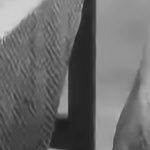

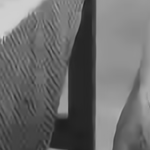

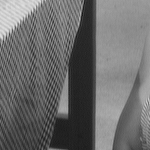

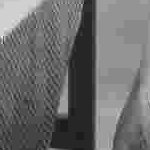

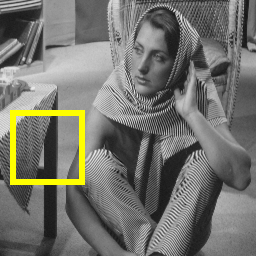

In [91]:
idx = 23
x = 20
y = 220
w=150
h =150
name = 'barbara'
idx = name

elem=[]
elem += glob.glob(f'../groupsc/jpeg_group_q10_s12/{name}_HQ_Q10.png')
elem += glob.glob(f'../groupsc/jpeg_sc_q10/{name}_HQ_Q10.png')
elem += glob.glob(f'../groupsc/datasets/HQ/Classic5/Q10/{name}_HQ_Q10.png')
elem += glob.glob(f'../groupsc/jpeg_q10/{name}_HQ_Q10.png')
elem += glob.glob(f'../ARCNN_classic5/barbara_.bmp')

elem_pil = [(Image.open(i)) for i in elem]
gt = elem_pil[2]

elem_pil = [i.crop((x,y,x+w,y+h)) for i in  elem_pil]

elem_pil[0].save(f'{idx}_group.png')
elem_pil[1].save(f'{idx}_sc.png')
elem_pil[2].save(f'{idx}_gt.png')
elem_pil[3].save(f'{idx}_noisy.png')
elem_pil[4].save(f'{idx}_arcnn.png')

display(elem_pil[4],elem_pil[0],elem_pil[1],elem_pil[2],elem_pil[3])

gt = gt.convert('RGB')
draw = ImageDraw.Draw(gt)
draw.rectangle(((x, y), (x+w,y+h)),outline ="yellow",width=13)
gt = gt.resize(tuple([x//2 for x in gt.size]))
gt.save(f'{idx}_bb.png')
display(gt)

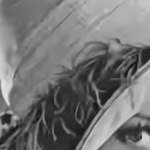

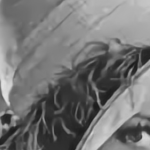

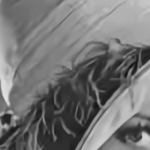

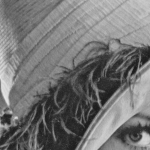

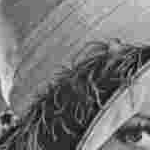

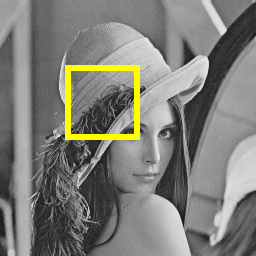

In [90]:
idx = 23
x = 130
y = 130
w=150
h =150
name = 'lena'
idx = name

elem=[]
elem += glob.glob(f'../groupsc/jpeg_group_q10_s12/{name}_HQ_Q10.png')
elem += glob.glob(f'../groupsc/jpeg_sc_q10/{name}_HQ_Q10.png')
elem += glob.glob(f'../groupsc/datasets/HQ/Classic5/Q10/{name}_HQ_Q10.png')
elem += glob.glob(f'../groupsc/jpeg_q10/{name}_HQ_Q10.png')
elem += glob.glob(f'../ARCNN_classic5/{name}.bmp')

elem_pil = [(Image.open(i)) for i in elem]
gt = elem_pil[2]

elem_pil = [i.crop((x,y,x+w,y+h)) for i in  elem_pil]

elem_pil[0].save(f'{idx}_group.png')
elem_pil[1].save(f'{idx}_sc.png')
elem_pil[2].save(f'{idx}_gt.png')
elem_pil[3].save(f'{idx}_noisy.png')
elem_pil[4].save(f'{idx}_arcnn.png')

display(elem_pil[1],elem_pil[4],elem_pil[0],elem_pil[2],elem_pil[3])
gt = gt.convert('RGB')
draw = ImageDraw.Draw(gt)
draw.rectangle(((x, y), (x+w,y+h)),outline ="yellow",width=13)
gt = gt.resize(tuple([x//2 for x in gt.size]))
gt.save(f'{idx}_bb.png')
display(gt)

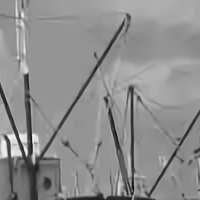

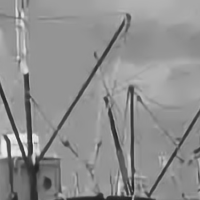

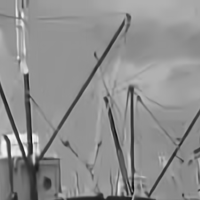

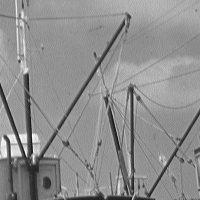

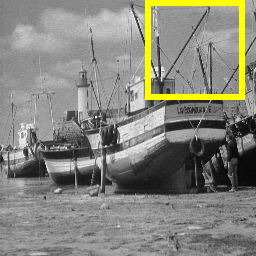

In [77]:
idx = 23
x = 290
y = 0
w=200
h =200
name = 'boats'
idx = name

elem=[]
elem += glob.glob(f'../groupsc/jpeg_group_q10_s12/{name}_HQ_Q10.png')
elem += glob.glob(f'../groupsc/jpeg_sc_q10/{name}_HQ_Q10.png')
elem += glob.glob(f'../groupsc/datasets/HQ/Classic5/Q10/{name}_HQ_Q10.png')
elem += glob.glob(f'../groupsc/jpeg_q10/{name}_HQ_Q10.png')
elem += glob.glob(f'../ARCNN_classic5/{name}.bmp')

elem_pil = [(Image.open(i)) for i in elem]
gt = elem_pil[2]

elem_pil = [i.crop((x,y,x+w,y+h)) for i in  elem_pil]

elem_pil[0].save(f'{idx}_group.png')
elem_pil[1].save(f'{idx}_sc.png')
elem_pil[2].save(f'{idx}_gt.png')
elem_pil[3].save(f'{idx}_noisy.png')
elem_pil[4].save(f'{idx}_arcnn.png')

display(elem_pil[1],elem_pil[4],elem_pil[0],elem_pil[2],elem_pil[3])
gt = gt.convert('RGB')
draw = ImageDraw.Draw(gt)
draw.rectangle(((x, y), (x+w,y+h)),outline ="yellow",width=13)
gt = gt.resize(tuple([x//2 for x in gt.size]))
gt.save(f'{idx}_bb.png')
display(gt)

In [68]:
elem

['../groupsc/jpeg_group_q10_s12/boats_HQ_Q10.png',
 '../groupsc/jpeg_sc_q10/boats_HQ_Q10.png',
 '../groupsc/datasets/HQ/Classic5/Q10/boats_HQ_Q10.png',
 '../groupsc/jpeg_q10/boats_HQ_Q10.png']

In [49]:
idx = 23
x = 100
y = 100
w=200
h =200
name = 'boat'
idx = name

elem=[]
elem += glob.glob(f'../groupsc/jpeg_group_q10_s12/{name}_HQ_Q10.png')
elem += glob.glob(f'../groupsc/jpeg_sc_q10/{name}_HQ_Q10.png')
elem += glob.glob(f'../groupsc/datasets/HQ/Classic5/Q10/{name}_HQ_Q10.png')
elem += glob.glob(f'../groupsc/jpeg_q10/{name}_HQ_Q10.png')
elem += glob.glob(f'../ARCNN_classic5/lena_.bmp')

elem_pil = [(Image.open(i)) for i in elem]
gt = elem_pil[2]

elem_pil = [i.crop((x,y,x+w,y+h)) for i in  elem_pil]

elem_pil[0].save(f'{idx}_group.png')
elem_pil[1].save(f'{idx}_sc.png')
elem_pil[2].save(f'{idx}_gt.png')
elem_pil[3].save(f'{idx}_noisy.png')
elem_pil[4].save(f'{idx}_arcnn.png')

display(elem_pil[4],elem_pil[0],elem_pil[1],elem_pil[2],elem_pil[3])
gt = gt.convert('RGB')
draw = ImageDraw.Draw(gt)
draw.rectangle(((x, y), (x+w,y+h)),outline ="yellow",width=13)
gt = gt.resize(tuple([x//2 for x in gt.size]))
gt.save(f'{idx}_bb.png')
display(gt)

IndexError: list index out of range

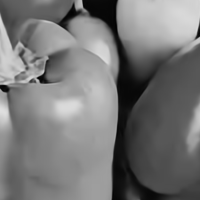

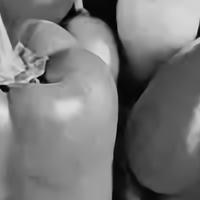

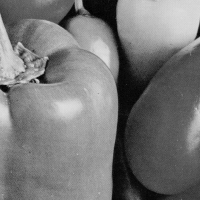

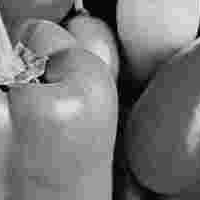

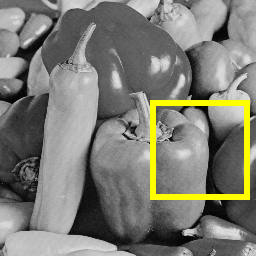

In [29]:
idx = 23
x = 300
y = 200
w=200
h =200
name = 'peppers'
idx = name

elem=[]
elem += glob.glob(f'../groupsc/jpeg_group_q10_s12/{name}_HQ_Q10.png')
elem += glob.glob(f'../groupsc/jpeg_sc_q10/{name}_HQ_Q10.png')
elem += glob.glob(f'../groupsc/datasets/HQ/Classic5/Q10/{name}_HQ_Q10.png')
elem += glob.glob(f'../groupsc/jpeg_q10/{name}_HQ_Q10.png')

elem_pil = [(Image.open(i)) for i in elem]
gt = elem_pil[2]

elem_pil = [i.crop((x,y,x+w,y+h)) for i in  elem_pil]

elem_pil[0].save(f'{idx}_group.png')
elem_pil[1].save(f'{idx}_sc.png')
elem_pil[2].save(f'{idx}_gt.png')
elem_pil[3].save(f'{idx}_noisy.png')

display(elem_pil[0],elem_pil[1],elem_pil[2],elem_pil[3])
gt = gt.convert('RGB')
draw = ImageDraw.Draw(gt)
draw.rectangle(((x, y), (x+w,y+h)),outline ="yellow",width=13)
gt = gt.resize(tuple([x//2 for x in gt.size]))
gt.save(f'{idx}_bb.png')
display(gt)